In [1]:
import os
import librosa.display as ld
import IPython.display as ipd
import matplotlib.pyplot as plt
import sys
import numpy as np
import math
import wave as wv


In [2]:
def waveform(data_array_signal,title="Waveform"):
    plt.title(title)
    plt.plot(data_array_signal,color="blue")
    plt.show()


In [3]:
def read_file(path,title="waveform"):    
    file = wv.open(path,"r")
    frames = file.readframes(-1)
    data_array_signal = np.frombuffer(frames,"int16")
    data_array_signal = np.asarray(data_array_signal,dtype='double')
    samples_count = file.getnframes()
#     print(data_array_signal.size)
    
   
    return data_array_signal, samples_count
    

In [4]:
def spectrogram(path):
    audio_array,sample = read_file(path)
    
    hamming_window = np.hamming(400)
    hop_count = math.floor(((sample-400)/160)+1)
    spectrogram = []
    for i in range(hop_count):
        low = i*160
        high =low+400
        each_window = audio_array[low:high]
        each_window = np.multiply(each_window,hamming_window)
        feature_vec = np.fft.fft(each_window,256)
        feature_vec = np.log(np.abs(feature_vec[0:128]))
        spectrogram.append(feature_vec)
    spectrogram=np.array(spectrogram)
    return spectrogram
# spec=spectrogram(path)
# print("spectrogram shape is ",spec.shape)
# print("spectrogram is \n",spec)   

In [5]:
def centering(X):
    X_mean = np.mean(X,axis=0)
    return X-X_mean

In [6]:
def whitening(data):
    cen_data = centering(data)
#     print("Sx ",S_x)
    Lamda,U = np.linalg.eigh((1/data.shape[0])*cen_data.T@cen_data)
    idx = Lamda.argsort()[::-1]   
    Lamda = Lamda[idx]
    U = U[:,idx]
    
#     print("Ushape",cen_data.shape)
#     print("Ushape",U.shape)
#     print("lamda",Lamda)
    
    Lamda_root = np.diag(np.sqrt(1/Lamda)) 
#     print(U)
    whitened_data = cen_data@U
    output=whitened_data@Lamda_root
    return output, Lamda_root, U


In [7]:
def plot_spectrogram(feature_vector,title="spectrograpm"):  
    fig=plt.figure(figsize=(20,10))
    plt.imshow(feature_vector.T)
    plt.title(title)
    plt.xlabel('Hop')
    plt.ylabel('Frequencies')

In [8]:
def make_cov(data):
    data=centering(data)
    covariance_matrix=(1/data.shape[0])*data.T@data
    return covariance_matrix

In [9]:
def average_nondiagnols(matrix):
    diag_elements = np.diag(matrix)
    diag_matrix = np.diag(diag_elements)
    nondiag_matrix = matrix-diag_matrix
    total_nondiag = matrix.shape[0]*matrix.shape[0]-matrix.shape[0]
    avg_nondiag = (1/total_nondiag)*np.sum(np.abs(nondiag_matrix))
    return(avg_nondiag)
    
# arr = np.arange(9)
# arr=arr.reshape(3,3)
# average_nondiagnols(arr)

In [10]:
clean_audio="/media/musa/New Volume/2.Semester II/3. MLSP/Assignments/1/speechFiles/clean.wav"
noisy_audio="/media/musa/New Volume/2.Semester II/3. MLSP/Assignments/1/speechFiles/noisy.wav"

# Loading clean audio and noisy audio and plotting their waveforms and spectrograms

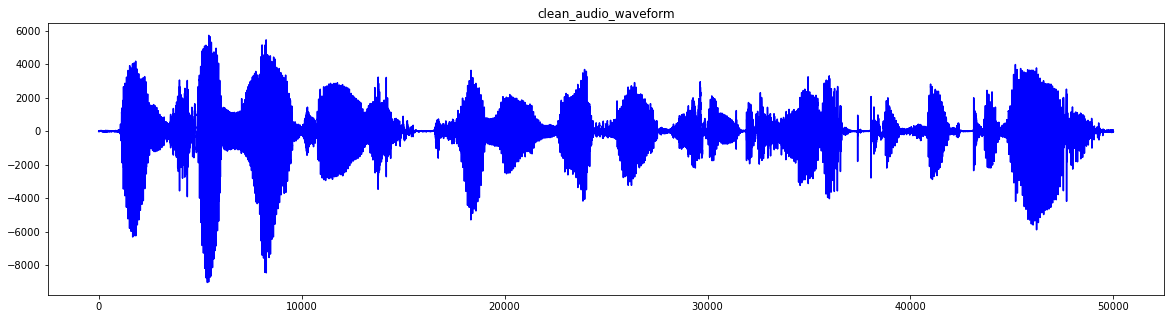

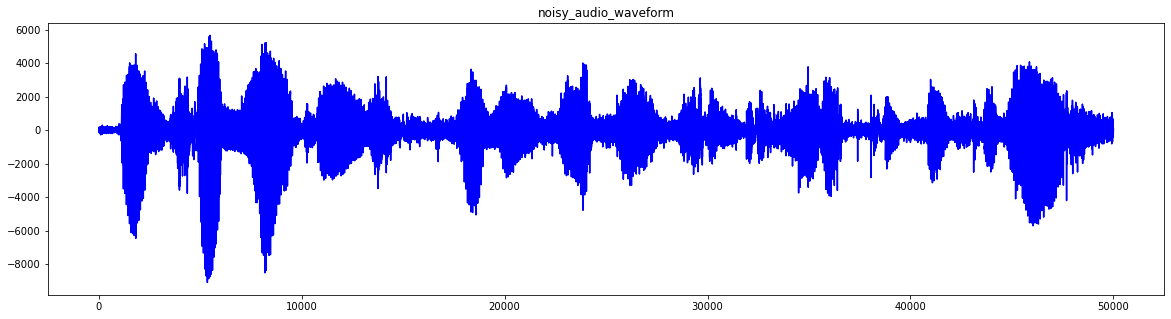

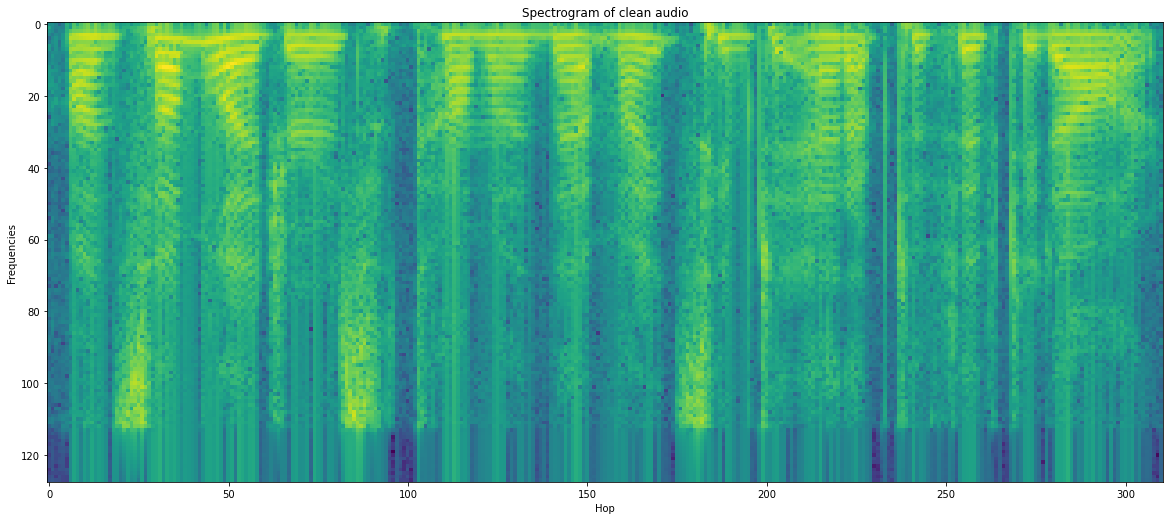

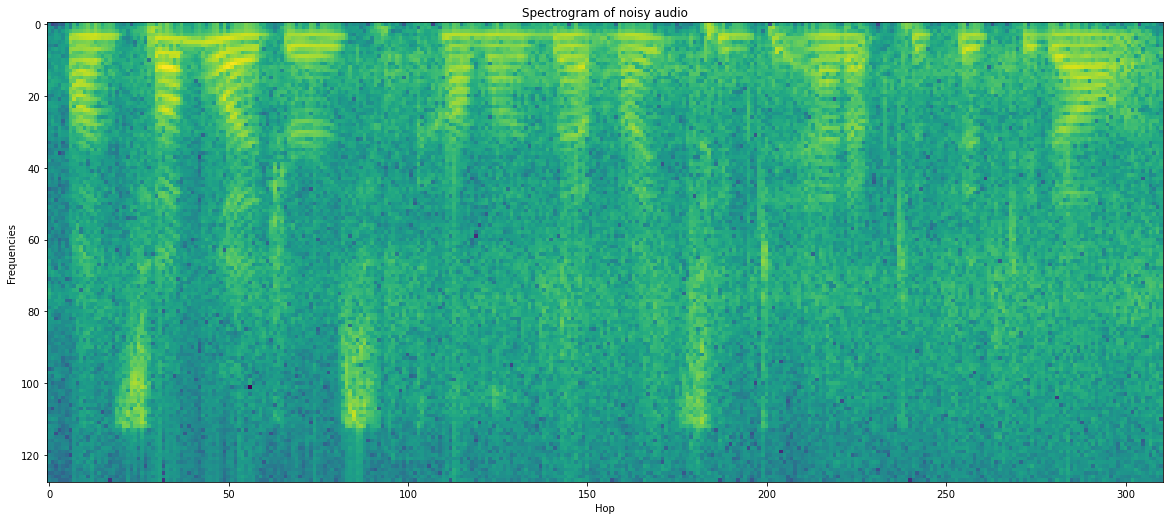

In [11]:
#reading files
clean_audio_array,total_samples_c=read_file(clean_audio)
noisy_audio_array,total_samples_n=read_file(noisy_audio)

#plotting waveform of clean
fig=plt.figure(figsize=(20,5))
waveform(clean_audio_array,"clean_audio_waveform")


#plotting waveform of noisy
fig=plt.figure(figsize=(20,5))
waveform(noisy_audio_array,"noisy_audio_waveform")

#making spectrogram for both files
spectrogram_clean_audio = spectrogram(clean_audio)
spectrogram_noisy_audio = spectrogram(noisy_audio)

# print(spectrogram_clean_audio)

#plotting spectrogram for both files
plot_spectrogram(spectrogram_clean_audio,"Spectrogram of clean audio")
plot_spectrogram(spectrogram_noisy_audio,"Spectrogram of noisy audio")

# Whitening on clean_audio

average abolute sum of non diagonal entries of covaraince of clean audio whitened by clean_audio parameters 2.4946583519013395e-15


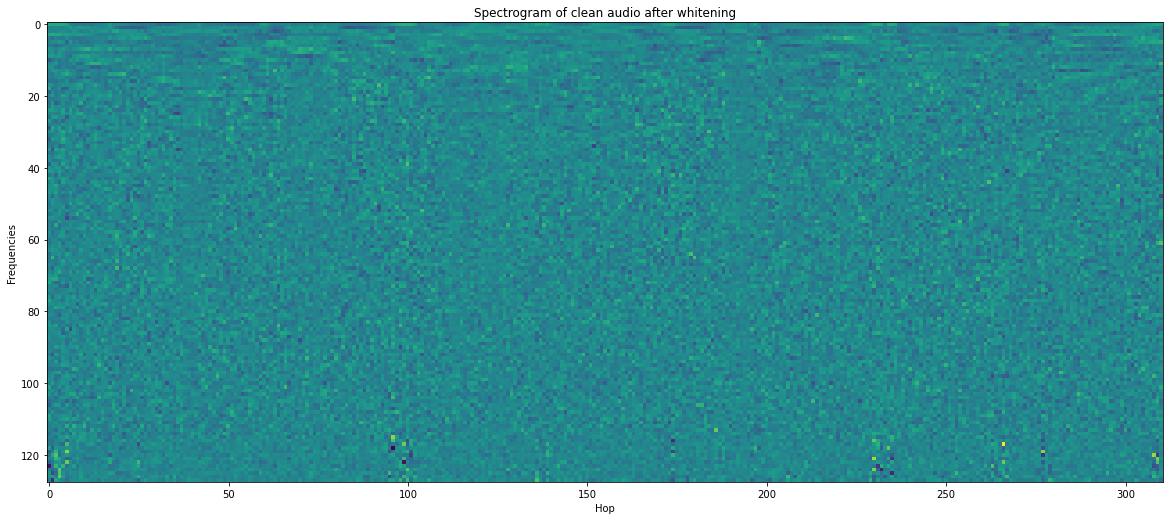

In [12]:
#whitening of spectrogram_clean_audio
projected_whitened,Lamda,U = whitening(spectrogram_clean_audio)
covariance_projected =(1/projected_whitened.shape[0])*projected_whitened.T@projected_whitened

plot_spectrogram(projected_whitened,"Spectrogram of clean audio after whitening")
av_covariance_projected =average_nondiagnols(covariance_projected)
print("average abolute sum of non diagonal entries of covaraince of clean audio whitened by clean_audio parameters",av_covariance_projected)

# Plotting covariance after and before whitening for clean audio

Text(0.5, 1.0, 'covariance_before whitening of clean audio')

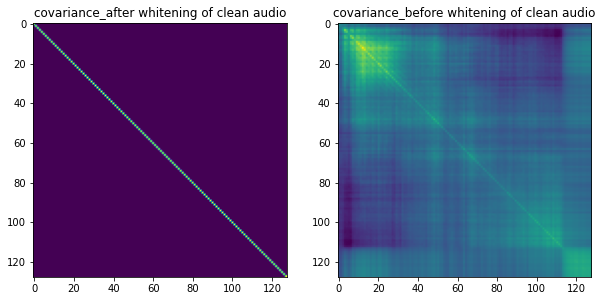

In [13]:
fig=plt.figure(figsize=(10,10))
plot=fig.add_subplot(1,2,1)
plt.imshow(covariance_projected)
plot.set_title("covariance_after whitening of clean audio")

# fig=plt.figure(figsize=(10,10))

plot=fig.add_subplot(1,2,2)
plt.imshow(make_cov(spectrogram_clean_audio))
plot.set_title("covariance_before whitening of clean audio")

From the above plots it is clear that covariance matrix becomes identity.

All the diagonal entries are exactly 1 and average absolute value of non-diagonal entries is very close to zero.

Quantitatively average absolute value of non-diagonal entries 2.4946583519013395e-15

# Part a) Whitening of Noisy_audio by Whitening Transformation of Clean_audio

average of non-diag_covariance of noisy data after whitened by clean audio is 0.15264469579042006


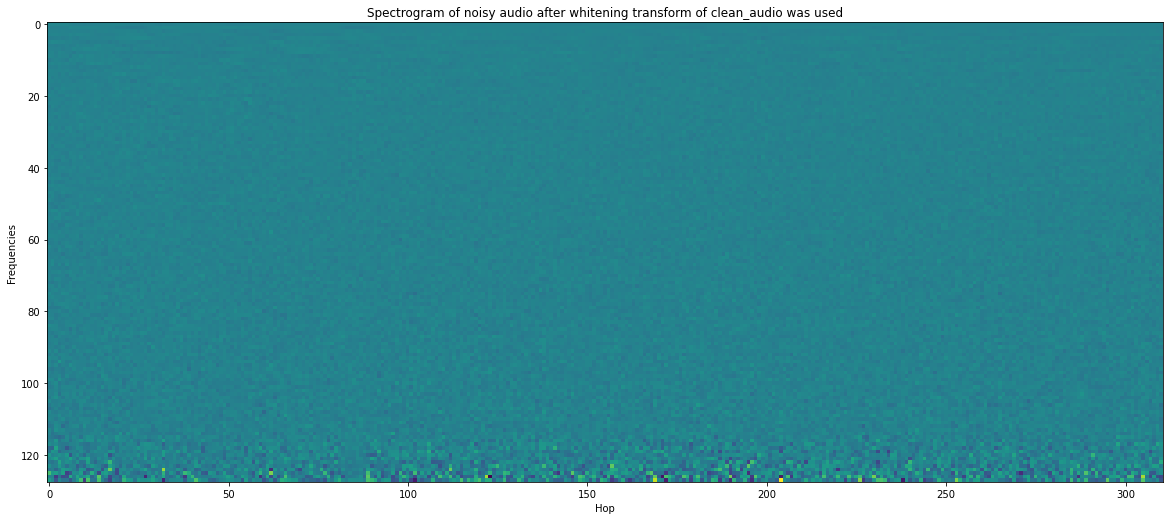

In [14]:
#data centering
spectrogram_noisy_audio = centering(spectrogram_noisy_audio)

# print(spectrogram_noisy_audio.shape)

# print(U.shape)

trans1=spectrogram_noisy_audio@U
projected_noisy = trans1@Lamda

covar_noisy = (1/projected_noisy.shape[0])*projected_noisy.T@projected_noisy

plot_spectrogram(projected_noisy,"Spectrogram of noisy audio after whitening transform of clean_audio was used")

av_covariance_projected_noisy =average_nondiagnols(covar_noisy)
print("average of non-diag_covariance of noisy data after whitened by clean audio is",av_covariance_projected_noisy)

# Plotting covaraince of noisy audio before and after whitening by clean audio parameters


Text(0.5, 1.0, 'covariance_before of noisy audio')

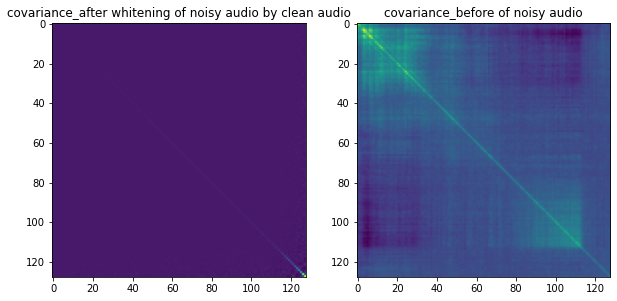

In [15]:
fig=plt.figure(figsize=(10,10))
plot=fig.add_subplot(1,2,1)
plt.imshow(covar_noisy)
plot.set_title("covariance_after whitening of noisy audio by clean audio")

# fig=plt.figure(figsize=(10,10))

plot=fig.add_subplot(1,2,2)
plt.imshow(make_cov(spectrogram_noisy_audio))
plot.set_title("covariance_before of noisy audio")

Above plots show before and after whitening effects on covaraince matrix of noisy file when whitened by clean audio parameters
Here average sum of non diagonals is 0.15264469579042 it is higher than previous which was way close to zero.
So noise is not properly whitened when we use whitening parameters from clean_audio

# Whitening on noisy audio

average of non-diag_covariance_projected 3.2094123763490046e-16


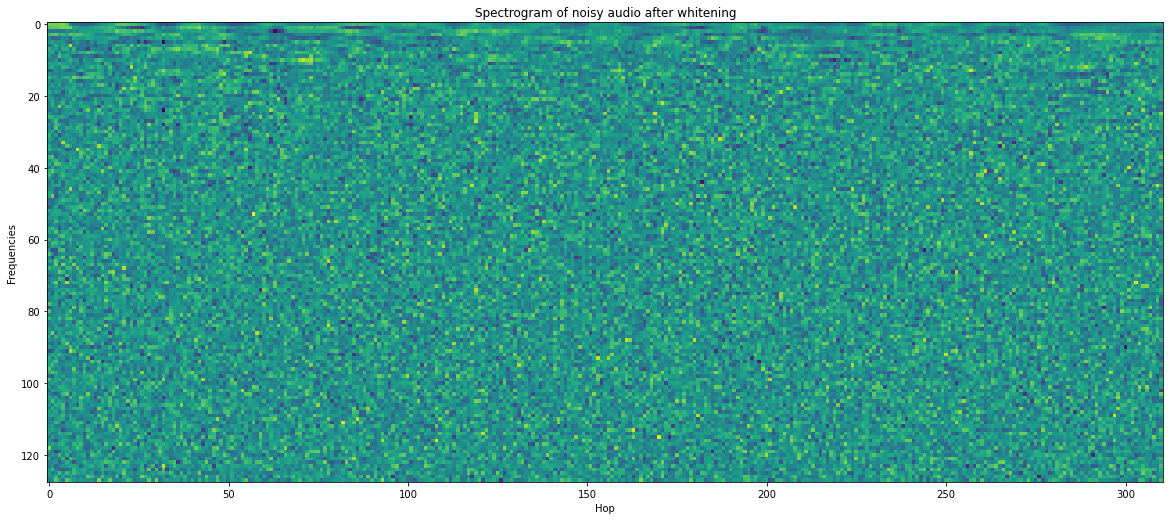

In [16]:
#whitening of spectrogram_noisy_audio
projected_whitened_noisy,Lamda_noisy,U_noisy = whitening(spectrogram_noisy_audio)
covariance_projected_noisy =(1/projected_whitened_noisy.shape[0])*projected_whitened_noisy.T@projected_whitened_noisy

plot_spectrogram(projected_whitened_noisy,"Spectrogram of noisy audio after whitening")
av_covariance_projected_noisy =average_nondiagnols(covariance_projected_noisy)
print("average of non-diag_covariance_projected",av_covariance_projected_noisy)

# Plotting covaraince of noisy audio before and after whitening

Text(0.5, 1.0, 'covariance_before whitening of clean audio')

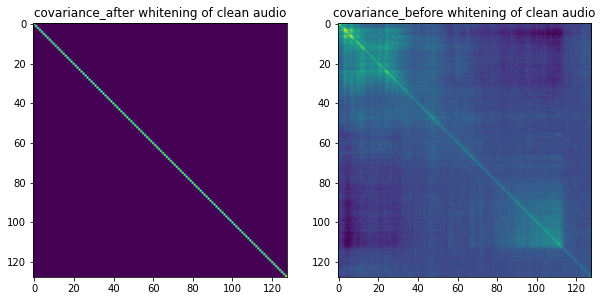

In [17]:
fig=plt.figure(figsize=(10,10))
plot=fig.add_subplot(1,2,1)
plt.imshow(covariance_projected_noisy)
plot.set_title("covariance_after whitening of clean audio")

# fig=plt.figure(figsize=(10,10))

plot=fig.add_subplot(1,2,2)
plt.imshow(make_cov(spectrogram_noisy_audio))
plot.set_title("covariance_before whitening of clean audio")

From the above plots it is clear that covariance matrix becomes identity.
All the diagonal entries areexactly 1 and average absolute value of non-diagonal entries is very close to zero.
Quantitatively average absolute value of non-diagonal entries 3.2094123763490046e-16

# Part b) Whitening of clean_audio by Whitening Transformation of noisy_audio

average of non-diag_covariance of noisy data after whitened by clean audio 0.12236253369723527


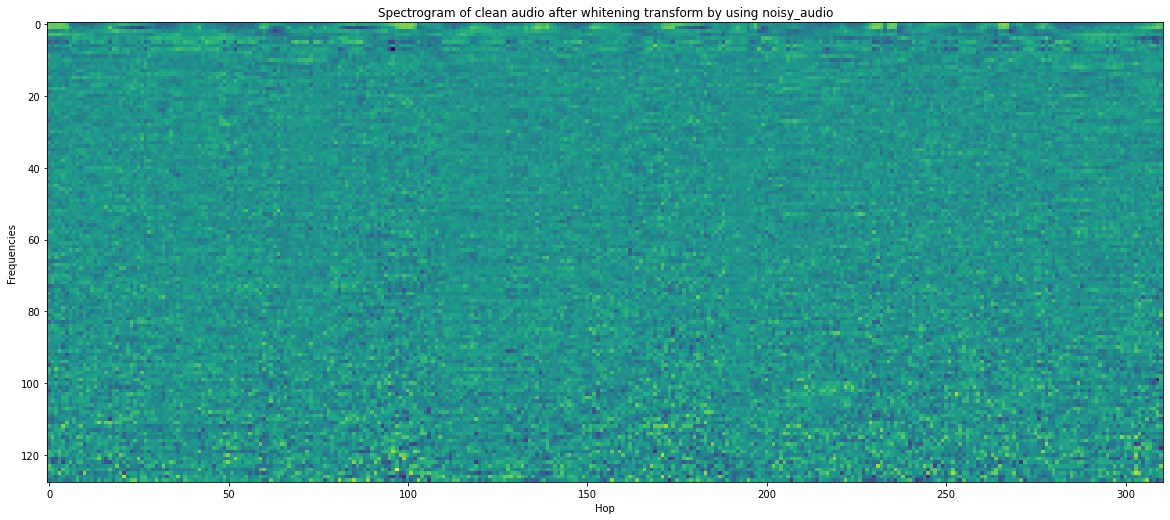

In [18]:
#data centering
spectrogram_clean_audio = centering(spectrogram_clean_audio)

# print(spectrogram_noisy_audio.shape)

# print(U.shape)

trans2=spectrogram_clean_audio@U_noisy
projected_clean = trans2@Lamda_noisy

covar_clean = (1/projected_clean.shape[0])*projected_clean.T@projected_clean

plot_spectrogram(projected_clean,"Spectrogram of clean audio after whitening transform by using noisy_audio")

av_covariance_projected_clean =average_nondiagnols(covar_clean)
print("average of non-diag_covariance of noisy data after whitened by clean audio",av_covariance_projected_clean)

# Plotting covaraince of clean audio before and after whitening by noisy audio parameters

Text(0.5, 1.0, 'covariance_before of clean audio')

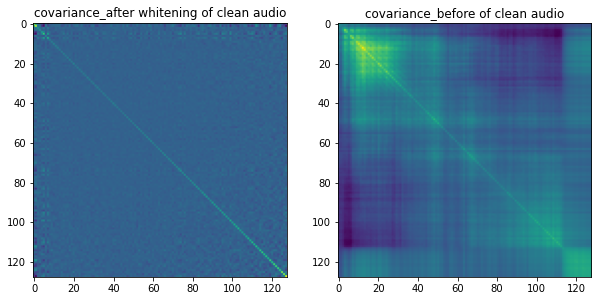

In [19]:
fig=plt.figure(figsize=(10,10))
plot=fig.add_subplot(1,2,1)
plt.imshow(covar_clean)
plot.set_title("covariance_after whitening of clean audio")

# fig=plt.figure(figsize=(10,10))

plot=fig.add_subplot(1,2,2)
plt.imshow(make_cov(spectrogram_clean_audio))
plot.set_title("covariance_before of clean audio")

Above plots show before and after whitening effects on covaraince matrix of clean file when whitened by noisy audio parameters.

Here average sum of non diagonals is 0.12236253369723527 it is higher than previous which was way close to zero.

So clean audio is not properly whitened when we use whitening parameters from noisy_audio

# Comments

##### Goal of whitening is to make mean of data=0 and covariance as identity i.e. to shift mean of data at origin and make data uncorrelated.

##### When we computed whitening parameters (Lamda,U) from one data and when these parameters are used to to whiten same data, the covariance infact becomes identity and average abolute sum of non diagonal entries was also very close to zero. Purpose of whitned is served in such a case.

##### However when the parameters were calculated from one data and used to whiten other data. Covarince matrix seem not to become identity. Also average abolute sum of non diagonal entries was relatively not close to zero.Which says data was not properly whitened to the fullest. 

##### Sometimes it may so happen that whitening parameters of one data can whiten other data distribution well but this is not the case always.

##### so whitenting transform for one data distribution cannot properly whiten data from other distributions always.